In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

## 머신 러닝 프로젝트

### 캘리포니아 주택 데이터셋 이용한 가격 탐지

In [4]:
# 데이터 가져오기
housing = pd.read_csv('data_ML/housing.csv')
# housing.head()
housing.info() 
# total_bedrooms 결측치 존재
# ocean_proximity은 자료형이 객체 - 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# 문자열 컬럼은 범주형인이 확인 - value_counts이용
housing['ocean_proximity'].value_counts()
# 5개 종류인 걸로 봐서 범주형

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# 숫자 데이터의 범위 확인 - describe()을 이용
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


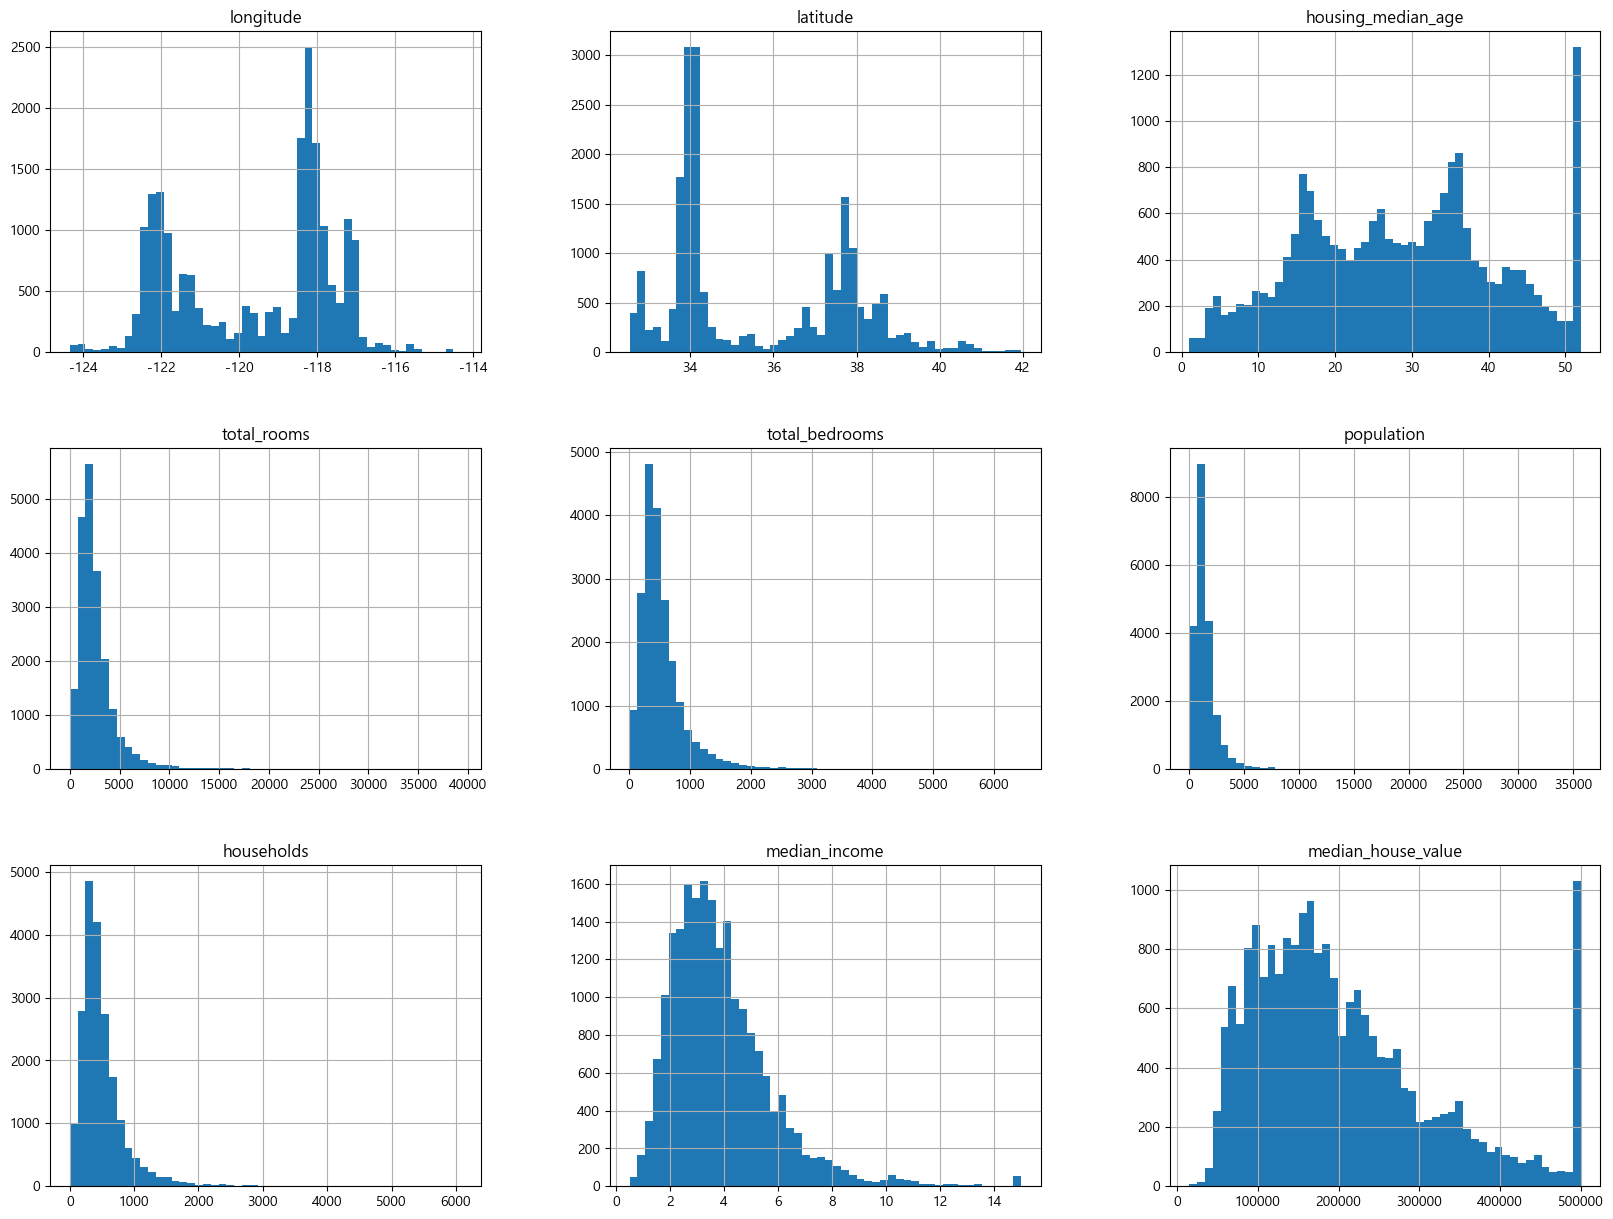

In [7]:
# 숫자 데이터의 경우는 분포를 확인 -히스토그램 생성
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

# 데이터의 분포가 한쪽으로 몰린 경우에는 데이터 분포를 조금 더 중앙에 많이
# 몰리도록 수정을 할 필요가 있음
# 로그 변환등을 이용
# 좌우로 너무 넓게 펄쳐져있는 경우 극단치를 제거하는 것에 대해 고려
# 각 숫자 데이터의 범위를 비교해서 범위 차이가 크면 스케일링 고려

### 데이터 분리

In [8]:
import sklearn.model_selection
help(sklearn.model_selection.train_test_split)
# arrays 는데이터의 비율
# test_size는 테스트 데이터의 비율
# train_size는 훈련 데이터의 비율로 test_size를 설정하면 설정하지 않습니다.
# 데이터가 아주 많으면 훈련하는데 시간이 너무 많이 걸릴 수 있어서 설정하기도 합니다.
# random_state 는 시드 번호로 설정하느 것을 권장
# shuffle 은 데이터를 섞을 지 여부로 random_state 를 설정하면 무의미
# stratify 는 층화추출을 하고자 할떄 데이터의 비율

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [9]:
# 8:2로 train, test 분할
train_set, test_set = sklearn.model_selection.train_test_split(housing,
                                                              test_size = .2,
                                                              random_state = 42)
# 분할된 데이터의 차원 확인
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [10]:
# 타겟과 특성 행렬을 분리
X = housing.drop('median_house_value', axis =1)
y = housing['median_house_value']

result = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
# print(len(result[0])) # X의 train
# print(len(result[1])) # X의 test
# print(len(result[2])) # y의 train
# print(len(result[3])) # y의 test

In [11]:
# 이렇게 받아오쟈
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.2,
                                                                            random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128, 9)


In [12]:
# 연속형 데이터를 범주형으로 변환
# median_income을 5 구간으로 분할
# 0- 1.5 -3.0 - 4.5 - 6, np.inf
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0, 1.5, 3.0, 4.5, 6, np.inf],
                              labels = [1, 2, 3, 4, 5])
housing['income_cat'].value_counts()
housing['income_cat'].value_counts()/20640

income_cat
3    0.351
2    0.319
4    0.176
5    0.114
1    0.040
Name: count, dtype: float64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
# 층화 추출을 위한 객체를 생성
# n_splits : 조각의 개수
# 몇 개의 조각을 만들것인지를 설정하는 것인데 k-folo validation 을 수행할 때 내부에서 사용
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)

result = split.split(housing, housing['income_cat'])
for train_index, test_index in result :
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]
    
start_train_set['income_cat'].value_counts() / len(start_train_set)

income_cat
3    0.351
2    0.319
4    0.176
5    0.114
1    0.040
Name: count, dtype: float64

### 데이터 탐색

In [14]:
# 상관 계수 출력
# corr_matrix = housing.corr() - 예전 API 숫자 이외의 컬럼 제거하고 계산
corr_matrix = housing.drop('ocean_proximity', axis =1).corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude               1.000    -0.925              -0.108        0.045   
latitude               -0.925     1.000               0.011       -0.036   
housing_median_age     -0.108     0.011               1.000       -0.361   
total_rooms             0.045    -0.036              -0.361        1.000   
total_bedrooms          0.070    -0.067              -0.320        0.930   
population              0.100    -0.109              -0.296        0.857   
households              0.055    -0.071              -0.303        0.918   
median_income          -0.015    -0.080              -0.119        0.198   
median_house_value     -0.046    -0.144               0.106        0.134   
income_cat             -0.011    -0.086              -0.147        0.221   

                    total_bedrooms  population  households  median_income  \
longitude                    0.070       0.100       0.055         -0.015   
latitude 

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>]], dtype=object)

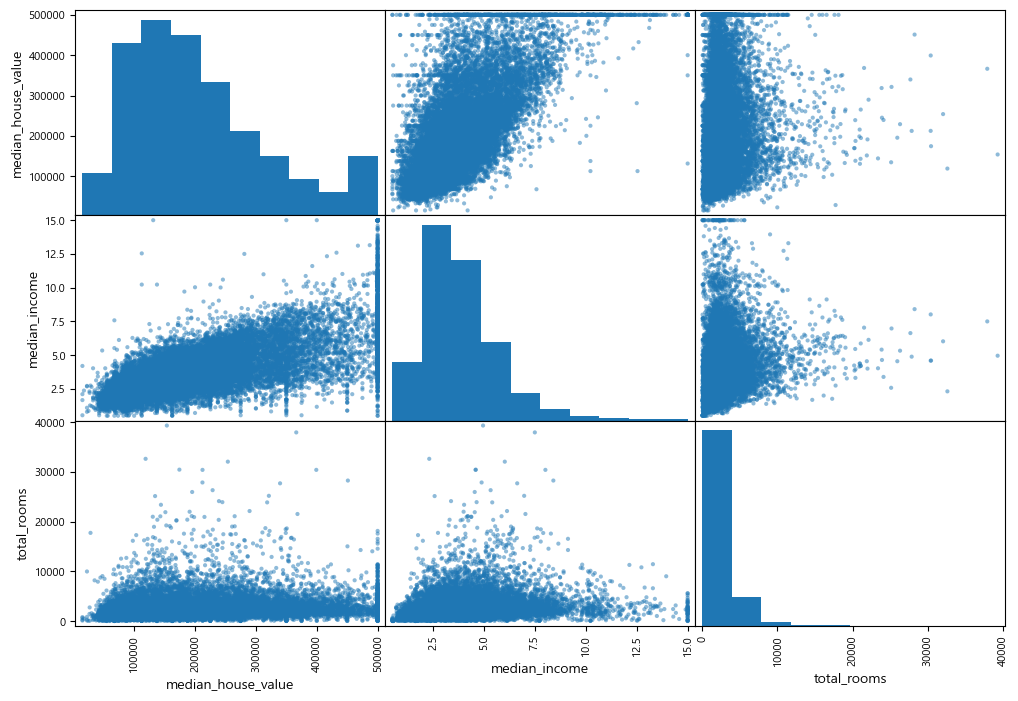

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms']], figsize=(12,8))
# plt.savefig('산포도1',format = 'png', dpi = 300)

### 특성 조합을 이용한 탐색

In [16]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/ housing['total_rooms']
corr_matrix = housing.drop('ocean_proximity', axis = 1).corr()
print(corr_matrix['median_house_value'].sort_values(ascending = False))

median_house_value    1.000
median_income         0.688
income_cat            0.644
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
bedrooms_per_room    -0.256
Name: median_house_value, dtype: float64


### 피쳐와 타겟을 분리

In [17]:
housing_features = start_train_set.drop('median_house_value', axis = 1)
housing_labels = start_train_set['median_house_value'].copy()

# print(housing_feature.head())
# print(housing_labels.head())

### 누락된 데이터 처리 : 누락된 행 제거 vs 누락된 행의 feature 제거 vs 대체

In [18]:
# 결측치 확인
sample_incomplete_rows = housing_features[housing_features.isnull().any(axis=1)]
print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   
...          ...       ...                 ...          ...             ...   
1350     -121.95     38.03                 5.0       5526.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
9149     -118.50     34.46                17.0      10267.0             NaN   
16757    -122.48     37.70                33.0       4492.0             NaN   
13336    -117.67     34.04                13.0       1543.0             NaN   

       population  households  median_income ocean_

In [19]:
# total_bedrooms 열에서 누락된 행 제거
housing_features.dropna(subset = ['total_bedrooms']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16354 non-null  float64 
 1   latitude            16354 non-null  float64 
 2   housing_median_age  16354 non-null  float64 
 3   total_rooms         16354 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16354 non-null  float64 
 6   households          16354 non-null  float64 
 7   median_income       16354 non-null  float64 
 8   ocean_proximity     16354 non-null  object  
 9   income_cat          16354 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [20]:
# 누락된 열 제거
sample_incomplete_rows.drop('total_bedrooms', axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.933,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.419,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.781,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.289,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.358,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.077,INLAND,3
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.367,<1H OCEAN,3
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.506,<1H OCEAN,4
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.055,NEAR OCEAN,3


In [21]:
# 누락값 중앙값으로 대체 - sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

# 숫자로된 컬럼만 추출해서 NaN값을 median을 대체
housing_num = housing_features.select_dtypes(include = [np.number])
#housing.info()
imputer.fit(housing_num)

X = imputer.transform(housing_num)
print(type(X))
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = list(housing_features.index.values))
print(housing_tr.head())

<class 'numpy.ndarray'>
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0          2.174  
15502      2015.0       768.0          6.337  
2908        667.0       300.0          2.875  
14053       898.0       483.0          2.226  
20496      1837.0       580.0          4.496  


### 범주형 데이터 처리

In [22]:
# 머신러닝은 숫자만 다룹니다.
# 범주형이나 문자열 데이터가 있다면 숫자로 변환을 해야 합니다.
# 범주형의 경우는 일련번호 형태로 변경을 하던가 원핫인코딩을 해야 합니다.
# 일련 번호 형태로 만들 때는 pandas 의 Series 의 factorize()를 이용할 수 있고
# sklearn.preprocessing.OrdinalEncoder 클래스를 이용해도 됩니다!

In [23]:
# 범주형 데이터 추출
housing_cat = housing_features['ocean_proximity']
housing_cat_encoded, housing_categoris = housing_cat.factorize()
print(housing_cat_encoded[:10])
print(housing_categoris)

[0 1 0 1 2 3 2 2 2 2]
Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
result = ordinalEncoder.fit_transform(housing_features[['ocean_proximity']])
print(result)

[[1.]
 [4.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [25]:
# 원 핫 인코딩 - 범주형의 개수만큼 열을 만들어서 해당하는 열에만 1을 표시
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()

#기본적으로 희소 행렬(sparse matrix)
result= oneHotEncoder.fit_transform(housing_features[['ocean_proximity']])
print(result[:10])
print("==========================================")
# 밀집 행렬로 변환
print(result.toarray()[:10])

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### 특성 스케일링

In [26]:
# 입력 숫자 특성들의 스케일이 많이 다르면 정확한 예측을 하지 못하는 경우가 발생
# 입력 숫자 특성들만 스케일링을 수행하는데 타겟의 경우는 범위가 너무 큰 경우 로그
# 스케일링을 수행하는 경우가 있지만 대부분은 수행하지 않음
# 훈련 데이터와 테스트 데이터로 분할 된 경우 훈련 데이터에만 fit을 수행하고
# 훈련 데이터와 테스트에 transform을 수행
# min-max scaler와 standard scaler 두 가지를 많이 이용

In [27]:
# 정규화 - MinMaxScaler (데이터 - 최소값)/(최댓값 - 최소값)
# 표준화 - StandardScaler (데이터 - 평균)/ (표편), 평균0, 분산1 로 만듬
#        - 범위의 상한과 하한이 없어서 어느 정도 값이 만들어질 지 예측하기가
#        - 어려움
#        - 딥러닝에서는 0 ~ 1 의 값만을 요구하는 경우가 있어서 이를 사용할 
#        - 수가 없음
#        - 이상치에 영향을 덜 받음 - 로버스트 합

### 전처리 작업을 위한 Pipeline(연속해서 작업을 수행)

In [28]:
# 결측치 대체를 하고 스케일링을 수행한다고 했을 때 따로따로 작업을 해도 되지만
# 이를 묶어서 한 번에 수행하도록 할 수 있습니다.
# 이렇게 여러개의 작업을 하나로 묶어서 수행하는 것을  pipeline 이라고 합니다.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-0.941  1.347  0.028 ...  0.733  0.556 -0.894]
 [ 1.172 -1.192 -1.722 ...  0.534  0.721  1.292]
 [ 0.268 -0.126  1.22  ... -0.675 -0.524 -0.525]
 ...
 [-1.571  1.31   1.539 ... -0.862 -0.865 -0.365]
 [-1.561  1.249 -1.165 ... -0.19   0.011  0.168]
 [-1.281  2.026 -0.131 ... -0.712 -0.799 -0.391]]


### 컬럼 별로 다른 변환기를 한꺼번에 적용해서 수행

In [30]:
# ColumnTransformer
# sklearn 0.20 버전에서 추가된 변환기로 여러 특성에 다흔 변환 처리를 할 수
# 있도록 해주는 클래스
# 만드는 방법은 Pipeline 과 유사한데 튜플을 만들 때 
# (변환기 이름, 변환기, 컬럼 리스트) 형태로 대입을 해야 합니다. 

In [31]:
from sklearn.compose import ColumnTransformer

#숫자 컬럼 이름 리스트
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
# print(num_attribs)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# 변환기 적용
housing_prepared = full_pipeline.fit_transform(housing_features)
print(housing_prepared)

[[-0.941  1.347  0.028 ...  0.     0.     0.   ]
 [ 1.172 -1.192 -1.722 ...  0.     0.     1.   ]
 [ 0.268 -0.126  1.22  ...  0.     0.     0.   ]
 ...
 [-1.571  1.31   1.539 ...  0.     0.     0.   ]
 [-1.561  1.249 -1.165 ...  0.     0.     0.   ]
 [-1.281  2.026 -0.131 ...  0.     0.     0.   ]]


In [32]:
# 데이터 화긴 - 모델을 만들기 위한 데이터
print(housing_prepared.shape)
print(housing_labels.shape)

(16512, 13)
(16512,)


### 모델 적용 및 테스트

In [33]:
# 선형 회귀 모델을 이용
from sklearn.linear_model import LinearRegression

# 예측 모델 인스턴스 생성
lin_reg = LinearRegression()

# 훈련
lin_reg.fit(housing_prepared, housing_labels)

# 테스트
some_data = housing_features.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('예측한 값:', lin_reg.predict(some_data_prepared))
print('실제 값:', some_labels)

예측한 값: [ 88983.148 305351.354 153334.712 184302.552 246840.19 ]
실제 값: 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


### 평가 지표

In [34]:
# 모델을 생성하고 나면 이 모델을 다른 모델과 비교하기 위해서는 평가지표가 있어야 합니다.
# 회귀의 평가지표로 사용되는 것으로는 RMSE 와 RMAE 등이 있음
# RMSE 는 예측한 값과 실제 값의 차이(residual - 잔차)를 제곱해서 더한 후
# 제곱슨을 해서 사용하고
# RMAE는 ...?

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#모델을 만들 때 사용한 데이터를 가지고 예측
housing_predictions = lin_reg.predict(housing_prepared)

# 잔차 제곱합
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

# 잔차의 절대값 합
lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print('잔차 제곱합 :', lin_mse)
print('잔차 제곱합의 제곱근 :', lin_rmse)
print('잔차 절댓값합 :', lin_mae)

잔차 제곱합 : 4767980139.451871
잔차 제곱합의 제곱근 : 69050.56219504567
잔차 절댓값합 : 49905.329442715316


In [36]:
# 집값이 120000~260000 사이가 많음
# 훈련에 사용한 데이터를 가지고 테스트를 했는데 훈련에 사용한 데이터에도
# 잘 맞지 않으면 > 과소 적합
# 훈련 데이터에는 잘 맞지만 테스트 데이터 또는 새로운 데이터에
# 잘 맞지 않으면 > 과대 적합
# 과소 적합이 발생하면 데이터의 수를 늘리거나, 다른 모델을 사용하거나
# 하이퍼 파라미터를 조정해야합니다.

### 새로운 모델 적용 -Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)

tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)

# 결정 의사 나무의 평가 지표가 아님
# tree_mse = mean_squared_error(housing_labels, housing_predictions)
# tree_rmse = np.sqrt(tree_mse)

# print(tree_rmse)

### k-fold cross-vaildation(K 겹 교차 검증)

In [ ]:
# 

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[71177.66  69770.079 64770.564 68536.602 67057.082 68847.125 70977.383
 69208.863 67187.871 73280.387]


###  그리드 탐색

In [ ]:
# 가장 좋은 하이퍼 파라미터를 찾는 것
# # GridSearchCV 를 이용하면 여러 종류의 하이퍼 파라미터를 설정해서
# 훈련한 후 가장 좋은 하이퍼 파라미터를 추천해줍니다...?!!
# 뭥?!!! 이런 좋은게 있었어?!!!! 세상에 인생을 헛살았넹
# # 파라미터를 설정할 때는 list의 dict로 설정을 하게 되는데 dict에 하이퍼 
# 파라미터 이름과 값의 list를 설정한느데 하나의 dict내에 있는 파라미터는 
# 모든 조합을 가지고 수행하고 각 dic는 별개로 수행
# # 시간이 오래 걸림

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)

#파라미터 조합을 생성 : 12 + 6 = 18 번 수행
param_grid = [{'n_estimators' : [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap' : [False], 'n_estimators':[3, 10], 'max_features' : [2, 3, 4]}]

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True, 
                          n_jobs = -1) # n_jobs 는 스레드의 개수
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
# 최적의 파라미터 출력
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


In [44]:
# 평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

63827.76261554265 {'max_features': 2, 'n_estimators': 3}
55056.82212305312 {'max_features': 2, 'n_estimators': 10}
52673.5498401615 {'max_features': 2, 'n_estimators': 30}
60299.48845134689 {'max_features': 4, 'n_estimators': 3}
53106.41271952157 {'max_features': 4, 'n_estimators': 10}
50370.55528306362 {'max_features': 4, 'n_estimators': 30}
58363.22748437211 {'max_features': 6, 'n_estimators': 3}
52446.057900340325 {'max_features': 6, 'n_estimators': 10}
50177.91173851986 {'max_features': 6, 'n_estimators': 30}
58058.12321723554 {'max_features': 8, 'n_estimators': 3}
51849.42681935635 {'max_features': 8, 'n_estimators': 10}
49941.11534754462 {'max_features': 8, 'n_estimators': 30}
62820.05402812565 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53846.18083156347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59026.17902108823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52996.55803561763 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [45]:
# 최적의 모델 가져오기
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


## 랜덤 서치

In [ ]:
# 그리드 서치는 하이퍼 파라미터 겂을 직접 입력해서 선택하도록 하는데 이 방식은
# 파라미터가 몇 개 안될 때는 유용하지만 많을 때는 사용하기가 어려움

# RandomizedSearchCV는 파라미터의 하한과 상한을 ...?

In [47]:
from scipy.stats import randint
#파라미터 조합을 생성 : 12 + 6 = 18 번 수행
param_distribs = [{'n_estimators' : [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap' : [False], 'n_estimators':[3, 10], 'max_features' : [2, 3, 4]}]

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(forest_reg, 
                                 param_distributions = param_distribs,
                                 cv =5,
                                scoring = 'neg_mean_squared_error',
                                n_jobs = -1, # n_jobs 는 스레드의 개수
                                n_iter = 10)
random_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

In [48]:
# 최적의 파라미터 출력
print(random_search.best_params_)
# 평가 점수 확인
cvres = random_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

{'n_estimators': 30, 'max_features': 6}
51891.75100173946 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
59026.17902108823 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
50177.91173851986 {'n_estimators': 30, 'max_features': 6}
58842.47703118809 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
55056.82212305312 {'n_estimators': 10, 'max_features': 2}
52673.5498401615 {'n_estimators': 30, 'max_features': 2}
52446.057900340325 {'n_estimators': 10, 'max_features': 6}
58363.22748437211 {'n_estimators': 3, 'max_features': 6}
53106.41271952157 {'n_estimators': 10, 'max_features': 4}
62820.05402812565 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}


### 앙상블

In [ ]:
# 여러개의 모델을 사용하는 방식
# DecisionTree 는 하나의 트리를 이용하지만 RandomForest 는 여러개의 DecisionTree를
# 가지고 예측합니다.
# # 테스트를 할 때는 모델을 만들 때 사용한 데이터가 아니라 테스트 데이터 가지고 테스트를
# 수행하기도 합니다.
# 훈련 데이터에는 잘 맞지만 테스트 데이터에 잘 맞지 않는 상황이 발생할 수 있는 데
# 이 경우를 overfitting, 과대 적합되었다고 하고
# 훈련 데이터에도 잘 맞지 않는다면, underfitting, 과소 적합 이라고 합니다.